<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_3_TelecoChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
ls /kaggle/input/telco-customer-churn

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_df = pd.read_csv(path)

In [185]:
df = base_df.copy()

In [186]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [125]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_groups']
Numerical columns: ['MonthlyCharges', 'TotalCharges']


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class Dropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    if 'customerID' in X.columns:
      return X.drop('customerID', axis=1, inplace=True)
    return X

In [ ]:
class NumericTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X = X.copy()
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    X['SeniorCitizen'] = X['SeniorCitizen'].astype('category')
    return X

In [ ]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X = X.copy()
    return X

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('dropper', Dropper()),
                 ('num_transform', NumericTransformer()),
                 ('cat_transform', CategoricalTransformer())])

In [ ]:
dropper = Dropper()
numeric_transform = NumericTransformer()
categorical_transform = CategoricalTransformer()

In [ ]:
numeric_transform.fit_transform(dropper.fit_transform(df))

In [ ]:
df = pipe.fit_transform(df)

In [ ]:
for i in df.columns:
  print(df[i].value_counts())

In [120]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']
binned = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
df['tenure_groups'] = binned.astype('category')

In [122]:
df.drop('tenure', axis=1, inplace=True)

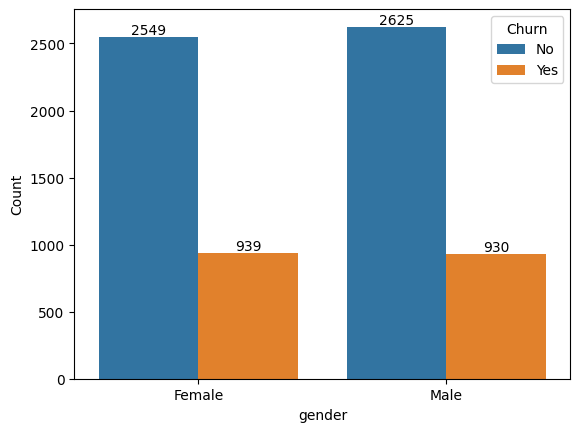

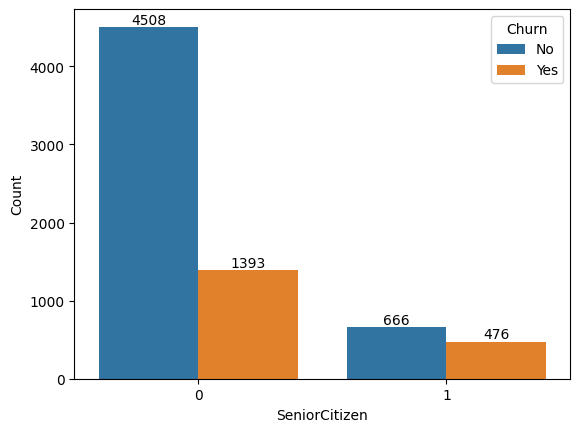

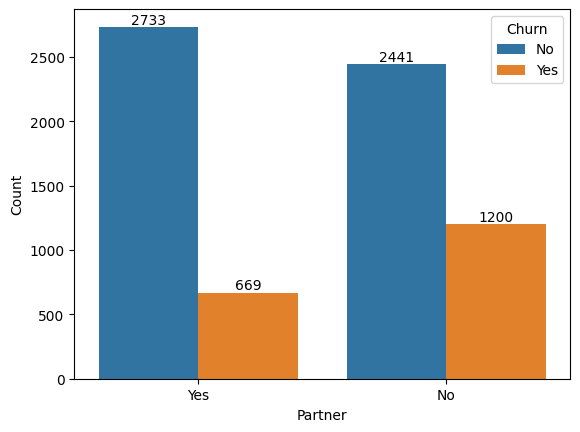

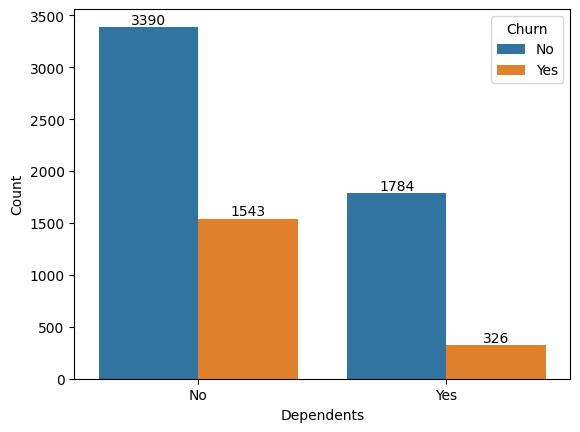

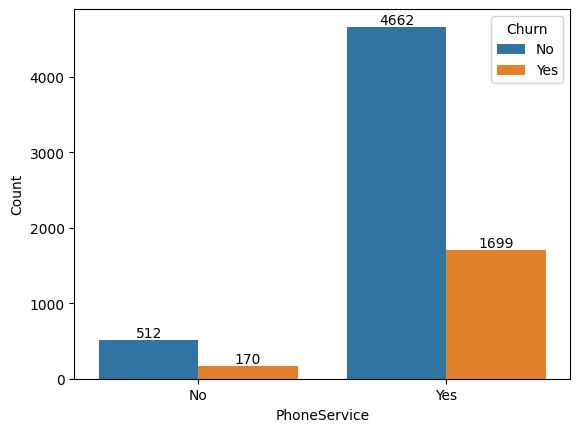

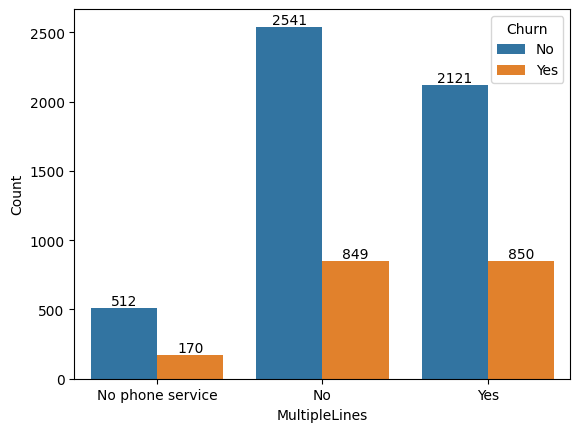

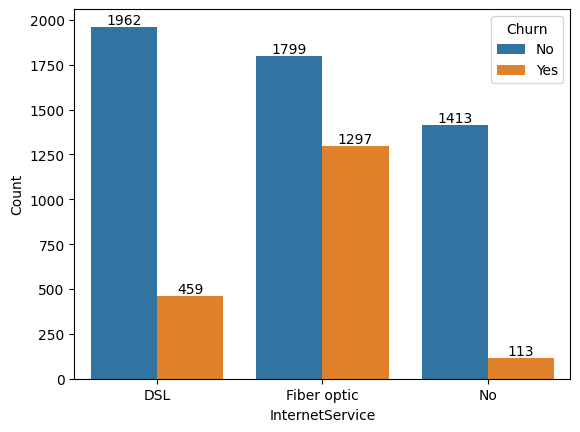

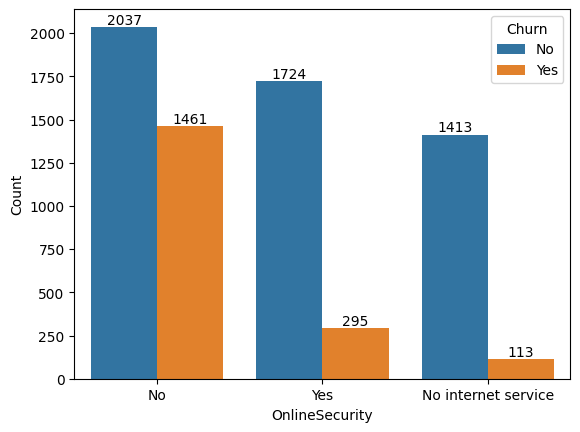

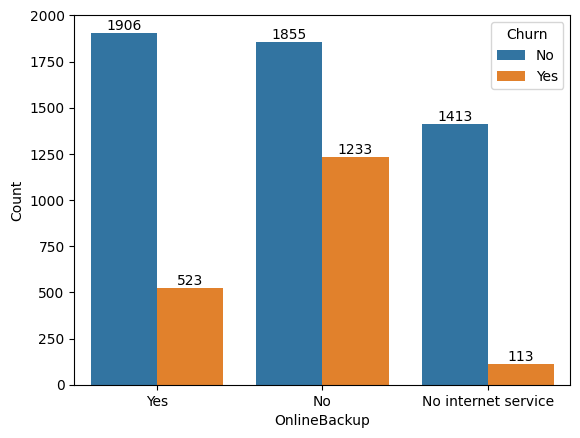

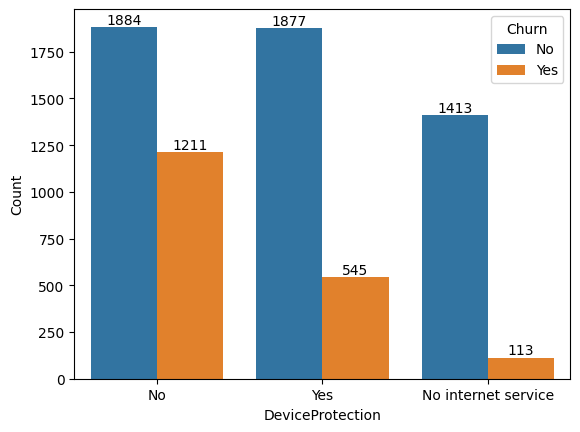

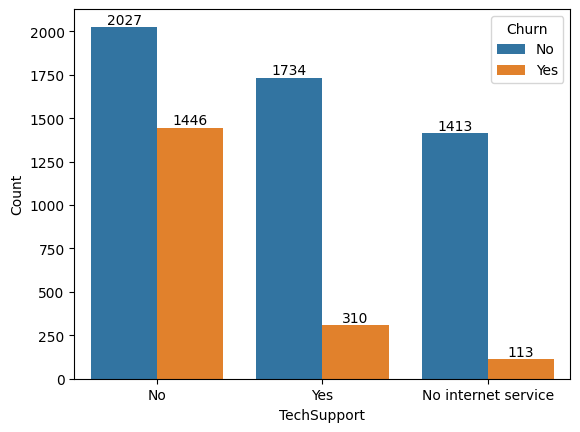

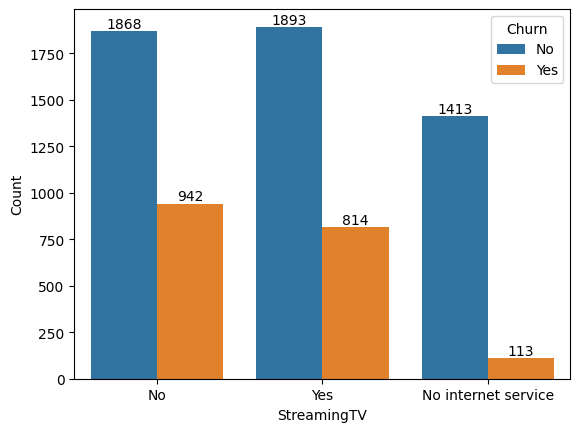

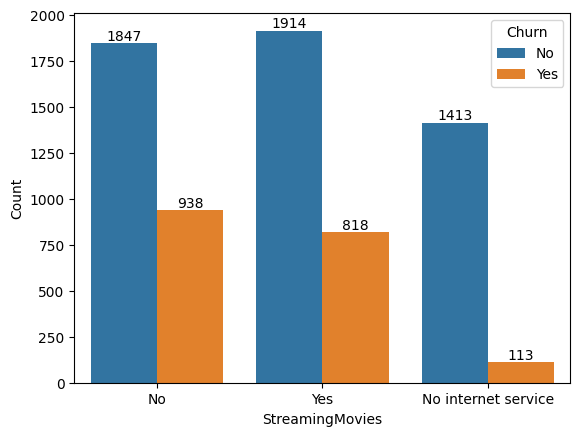

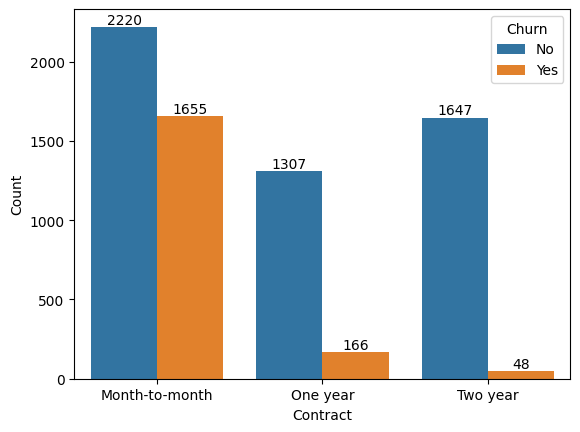

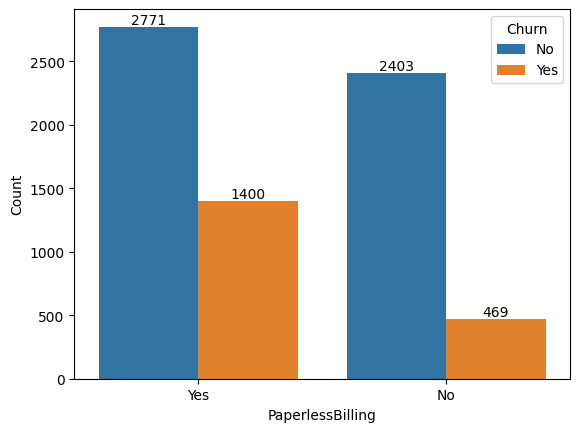

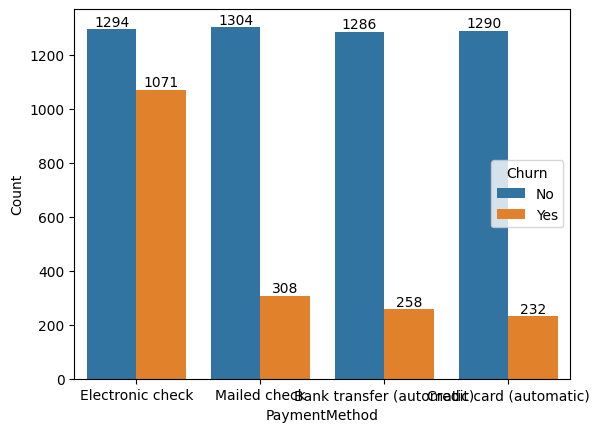

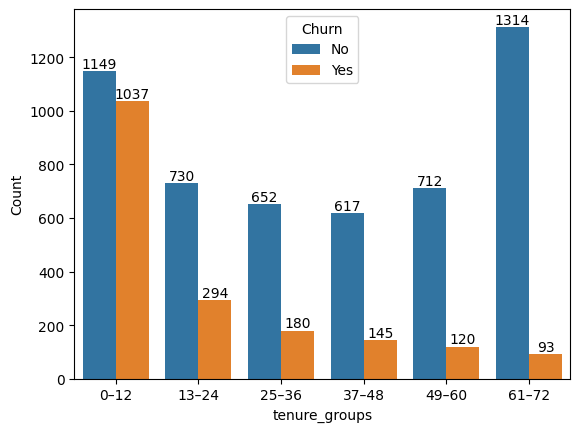

In [123]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  ax = sns.countplot(data=df, x=predictor, hue='Churn')
  plt.xlabel(predictor)
  plt.ylabel('Count')

  # Add value labels on top of the bars
  for container in ax.containers:
    ax.bar_label(container)

  plt.show()

In [124]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_groups'],
      dtype='object')

In [126]:
numerical_columns

['MonthlyCharges', 'TotalCharges']

In [127]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

category_encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [133]:
categorical_columns.remove('Churn')

In [134]:
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [142]:
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_groups']

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class Dropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    if 'customerID' in X.columns:
      return X.drop('customerID', axis=1)
    return X

class NumericTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.imputer  = SimpleImputer(strategy='mean')
    self.scaler = StandardScaler()
    self.numeric_cols = ['MonthlyCharges', 'TotalCharges']

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    X = X.copy()
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    X['SeniorCitizen'] = X['SeniorCitizen'].astype('category')
    X[self.numeric_cols] = self.imputer.fit_transform(X[self.numeric_cols])
    X[self.numeric_cols] = self.scaler.fit_transform(X[self.numeric_cols])
    return X

class CategoricalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.imputer = SimpleImputer(strategy='most_frequent')
    self.le = LabelEncoder()
    self.encoder = OneHotEncoder(drop='first')
    self.categorical_cols = ['gender','SeniorCitizen',
                            'Partner','Dependents',
                            'PhoneService','MultipleLines',
                            'InternetService','OnlineSecurity',
                            'OnlineBackup','DeviceProtection',
                            'TechSupport','StreamingTV',
                            'StreamingMovies','Contract',
                            'PaperlessBilling','PaymentMethod',
                            'tenure_groups']

  def fit(self, X, y=None):
    return self

  def bin(self, X):
    bins = [0, 12, 24, 36, 48, 60, 72]
    labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']
    binned = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
    X['tenure_groups'] = binned.astype('category')

  def transform(self, X):
    X = X.copy()
    self.bin(X)
    X.drop('tenure', axis=1, inplace=True)
    X[categorical_columns] = self.imputer.fit_transform(X[self.categorical_cols])
    encoded_features = encoder.fit_transform(X[self.categorical_cols])
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
    if 'Churn' in X.columns:
      X['Churn'] = X['Churn'].fillna('ffill')
      X['Churn'] = self.le.fit_transform(X['Churn'])
    X = pd.concat([X.drop(categorical_columns, axis=1), encoded_df], axis=1)
    return X

In [175]:
dropper = Dropper()
num_transform = NumericTransformer()
cat_transform = CategoricalTransformer()

In [201]:
Dropper().fit_transform(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [216]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('dropper', Dropper()),
                 ('num_transform', NumericTransformer()),
                 ('cat_transform', CategoricalTransformer())])

In [212]:
df = base_df.copy()

In [213]:
df = pipe.fit_transform(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X_test)

In [221]:
model.score(X_test, y_test)

0.7877927608232789